<a href="https://colab.research.google.com/github/byannurcahyo/2241720134-PCVK-2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import glob as glob

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


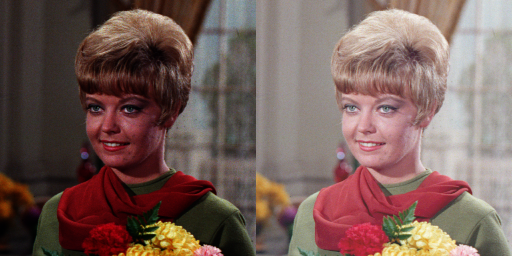

In [31]:
#1. Buat Gamma Correction
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_correction = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_correction[y,x,c] = 255*(pow(original[y,x,c]/255, 1/gamma))


final_frame = cv.hconcat((original, gamma_correction))
cv2_imshow(final_frame)

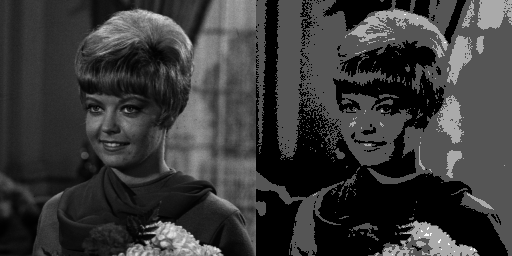

In [32]:
#2. Buat Simulasi Image Depth
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff',cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = round(original[y,x]/level)*level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

PSNR for 5 average: 27.535156229621425


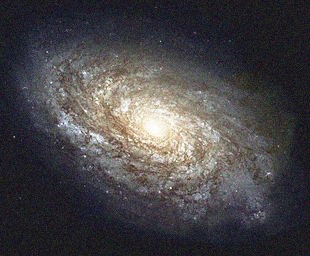

PSNR for 10 average: 27.5581201507784


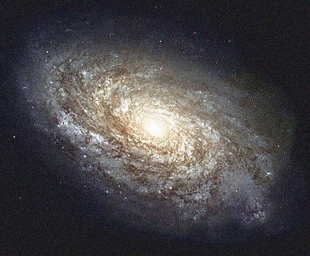

PSNR for 20 average: 27.51095261151212


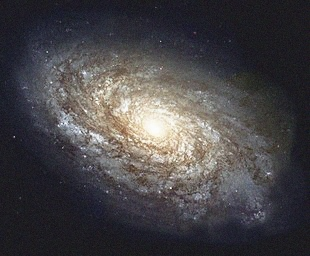

PSNR for 40 average: 27.459756491016467


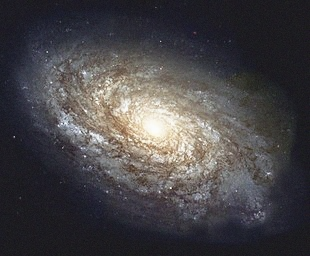

PSNR for 80 average: 27.403741703818426


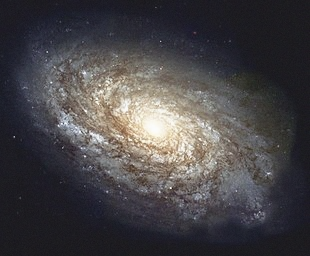

PSNR for 100 average: 27.370931279516654


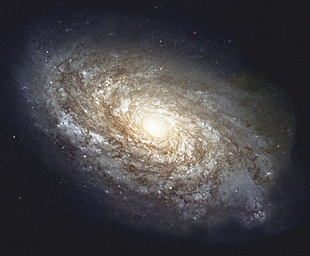

In [36]:
#3. Buat modul Average Denoising
cv_img =[]
img_original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PNSR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def averageDenoising(index):
    denoised_image = np.zeros_like(cv_img[0], dtype=np.float32)
    for i in range(index):
        denoised_image += cv_img[i].astype(np.float32)

    return denoised_image / index

average_counts = [5, 10, 20, 40, 80, 100]

for count in average_counts:
    if count <= len(cv_img):
        denoised_image = averageDenoising(count)
        denoised_image = np.uint8(denoised_image)
        print(f'PSNR for {count} average: {PNSR(img_original, denoised_image)}')
        cv2_imshow(denoised_image)
    else:
        print(f'Not enough images for {count} average.')

Semakin banyak gambar yang digunakan, maka kualitas gambar semakin bagus dan tidak terdapat noise.

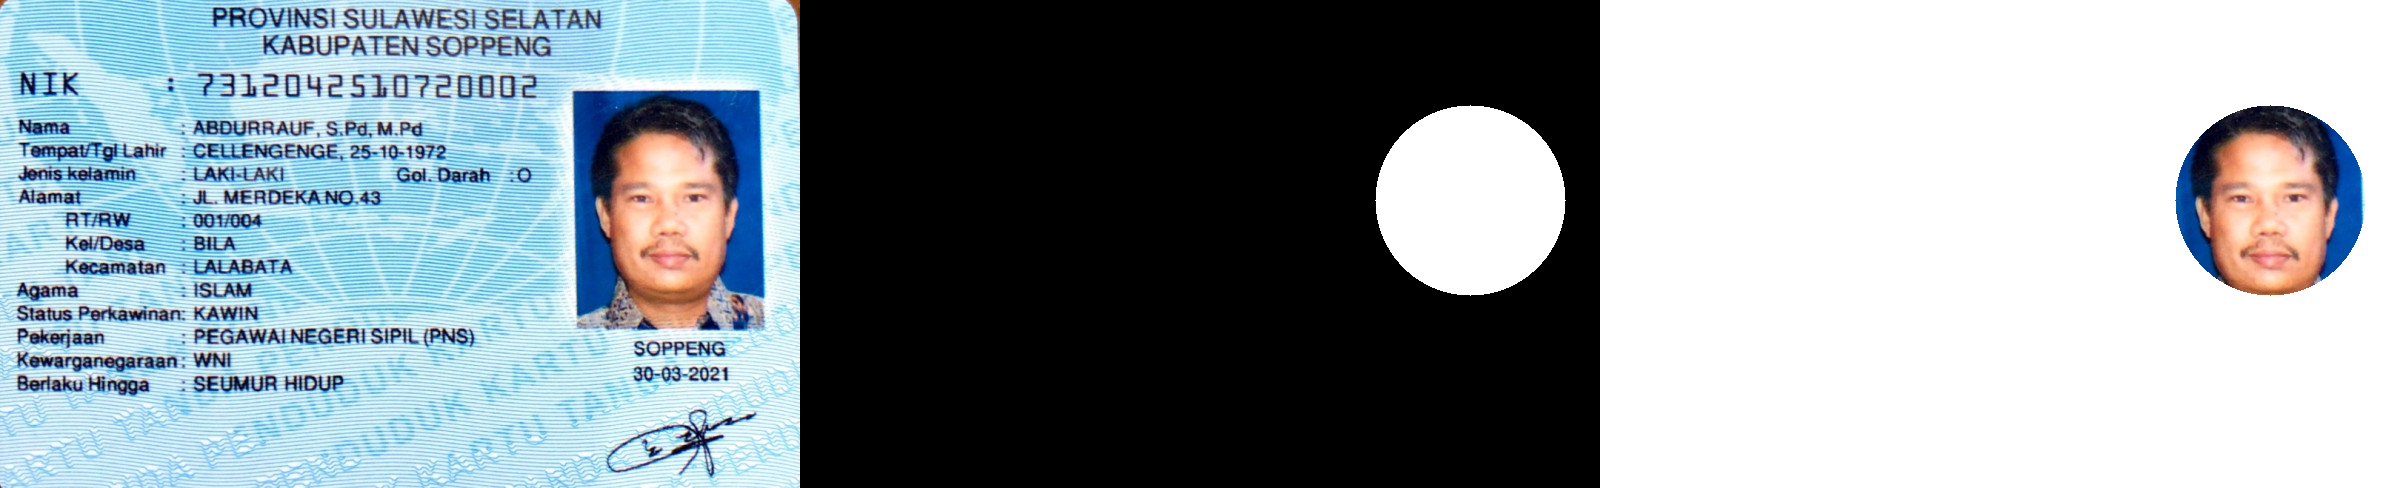

In [34]:
#4. Buat image masking
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

mask = np.zeros(ktp.shape, ktp.dtype)
cv.circle(mask, center=(670,200), radius=95, color=(255,255,255), thickness=cv.FILLED)
masked = cv.bitwise_and(ktp,mask)
whitebg = np.full(ktp.shape,255 ,ktp.dtype)
res = np.where(mask != 0, masked, whitebg)
final_frame = cv.hconcat((ktp, mask,res))
cv2_imshow(final_frame)

Operator NOT


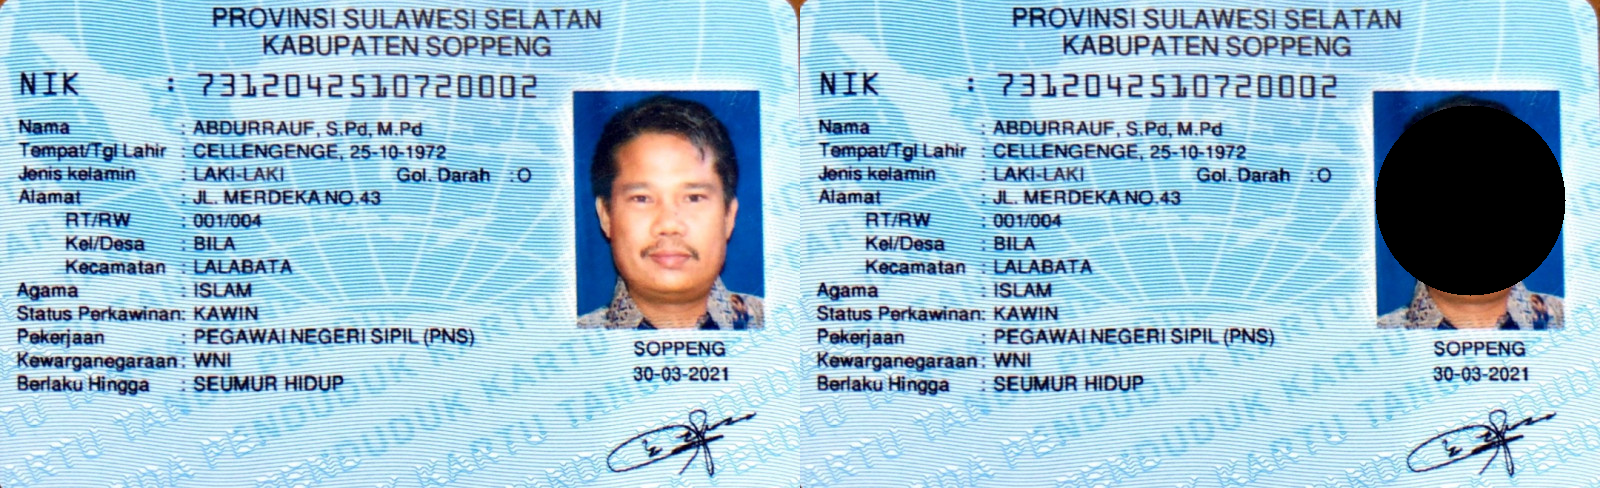

Operator OR


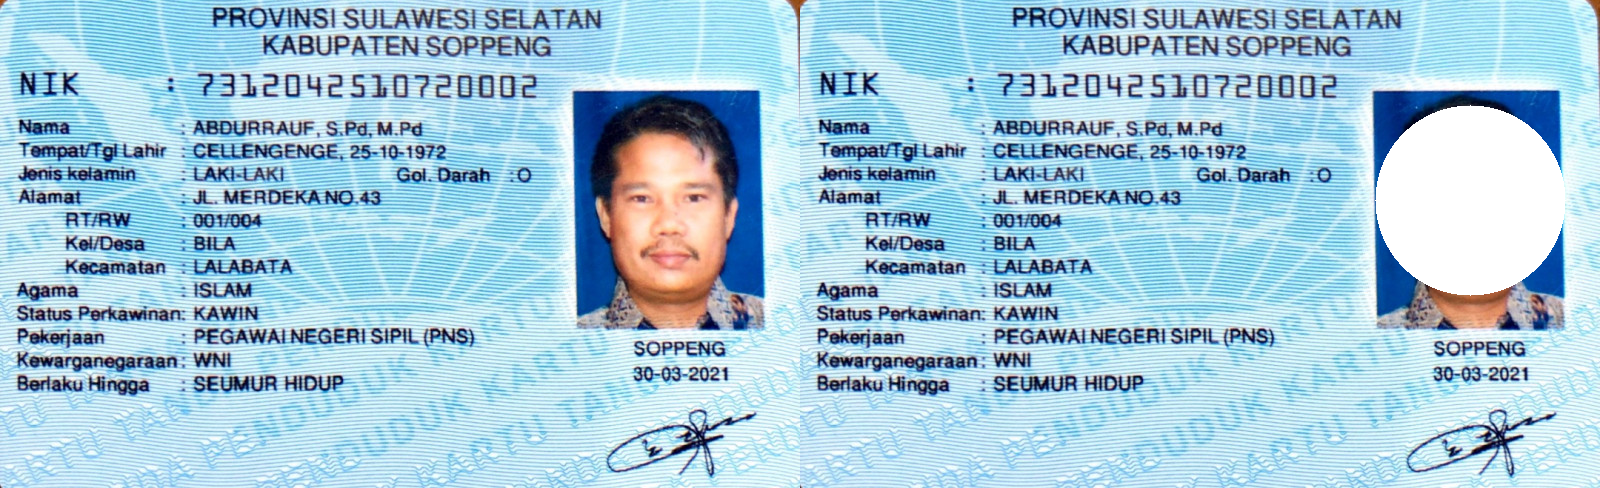

Operator AND


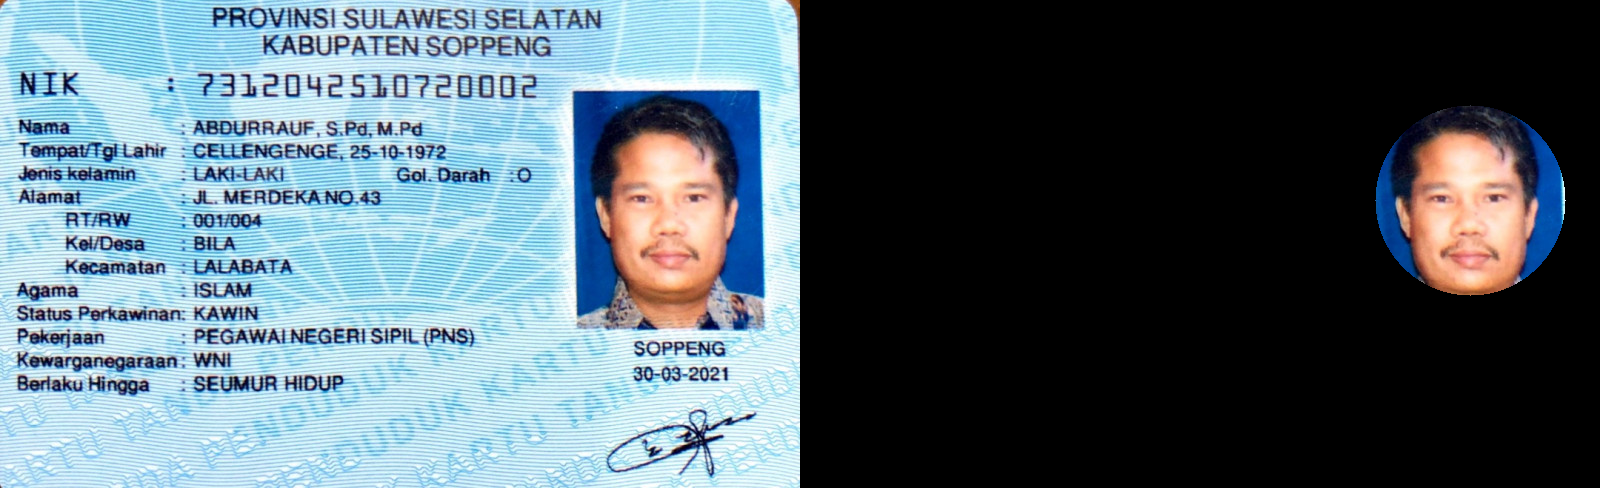

Operator NAND


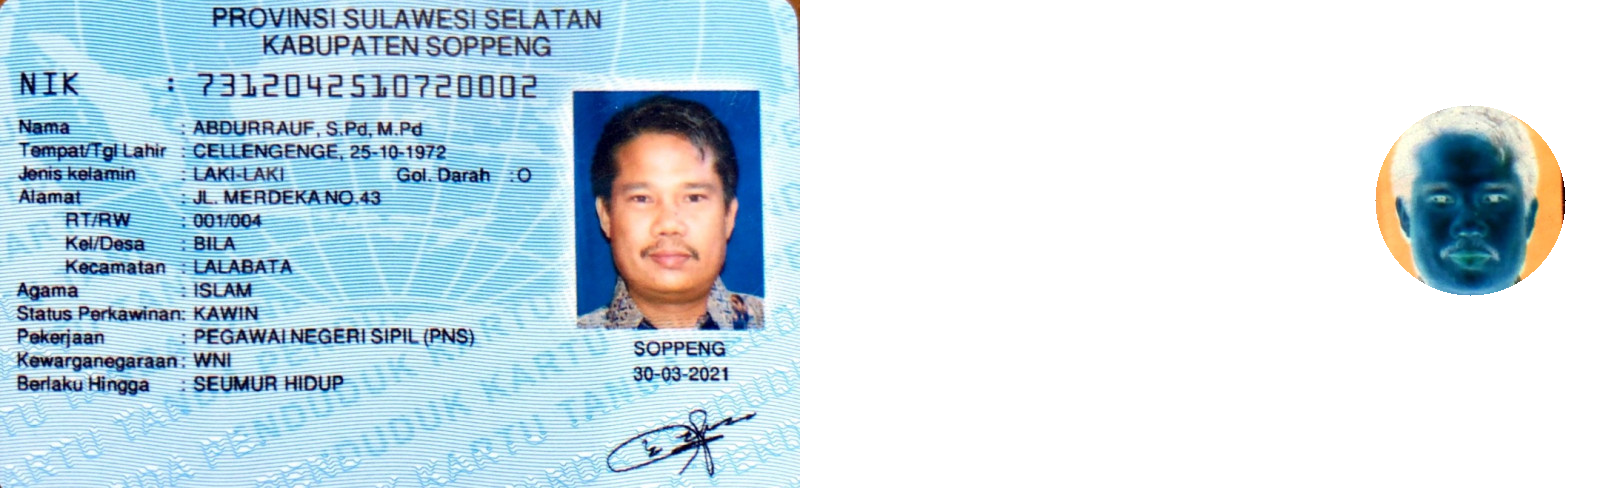

Operator XOR


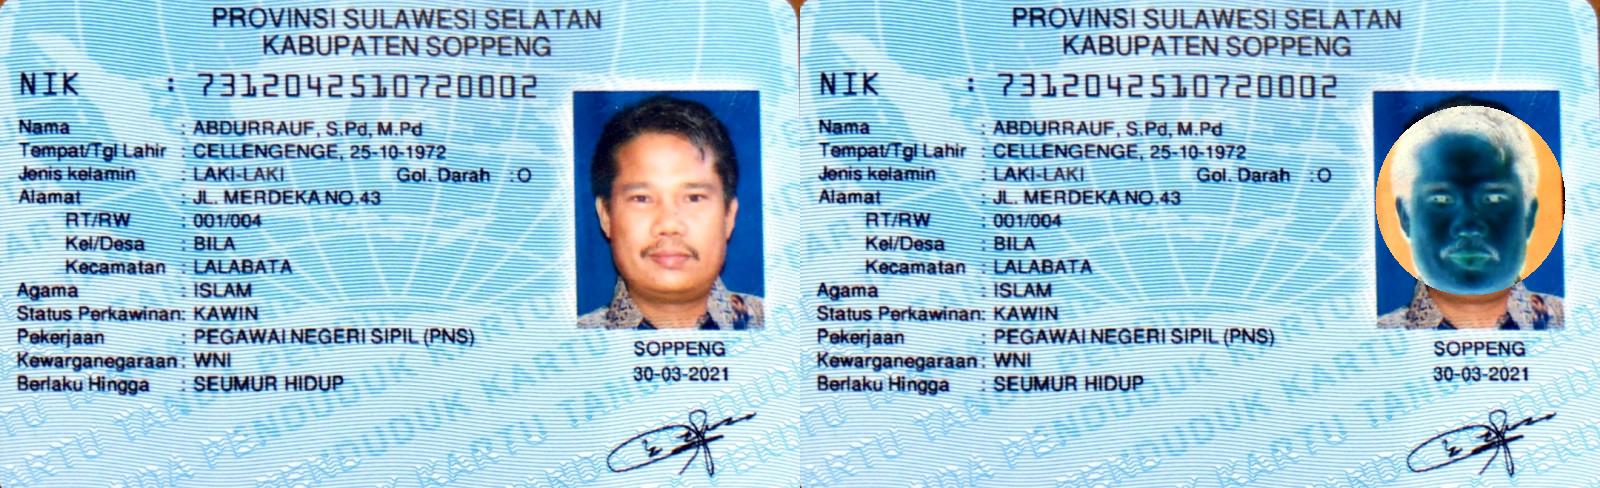

In [5]:
#5. Lakukan percobaan menggunakan operator lain

# a. Operator NOT
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
mask = np.zeros(ktp.shape, ktp.dtype)
cv.circle(mask, center=(670,200), radius=95, color=(255,255,255), thickness=cv.FILLED)
mask1 = cv.bitwise_not(mask)
mask2 = cv.bitwise_and(ktp,mask1)
final_frame = cv.hconcat((ktp, mask2))
print('Operator NOT')
cv2_imshow(final_frame)

# b. Operator OR
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
mask = np.zeros(ktp.shape, ktp.dtype)
cv.circle(mask, center=(670,200), radius=95, color=(255,255,255), thickness=cv.FILLED)
mask = cv.bitwise_or(ktp,mask)
final_frame = cv.hconcat((ktp, mask))
print('Operator OR')
cv2_imshow(final_frame)

# c. Operator AND
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
mask = np.zeros(ktp.shape, ktp.dtype)
cv.circle(mask, center=(670,200), radius=95, color=(255,255,255), thickness=cv.FILLED)
mask = cv.bitwise_and(ktp,mask)
final_frame = cv.hconcat((ktp, mask))
print('Operator AND')
cv2_imshow(final_frame)

# d. Operator NAND
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
mask = np.zeros(ktp.shape, ktp.dtype)
cv.circle(mask, center=(670,200), radius=95, color=(255,255,255), thickness=cv.FILLED)
mask1 = cv.bitwise_and(ktp,mask)
mask2 = cv.bitwise_not(mask1)
final_frame = cv.hconcat((ktp, mask2))
print('Operator NAND')
cv2_imshow(final_frame)

# e. Operator XOR
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
mask = np.zeros(ktp.shape, ktp.dtype)
cv.circle(mask, center=(670,200), radius=95, color=(255,255,255), thickness=cv.FILLED)
mask = cv.bitwise_xor(ktp,mask)
final_frame = cv.hconcat((ktp, mask))
print('Operator XOR')
cv2_imshow(final_frame)

*   Operator NOT : Menghasilkan inversi dari mask, di mana area dalam lingkaran menjadi hitam.
*   Operator OR : Menggabungkan gambar asli dan mask, menampilkan semua bagian dari kedua input dengan lingkaran putih.
*   Operator AND : Menampilkan hanya bagian gambar asli yang berada di dalam area mask, sementara area di luar menjadi hitam.
*   Operator NAND : Kebalikan dari AND, di mana area di dalam lingkaran menjadi hitam dan area di luar menampilkan gambar asli.
*   Operator XOR : Menampilkan bagian gambar asli yang tidak beririsan dengan mask, di mana area dalam lingkaran menjadi hitam.